# Lag Compensation

**Lecturer**

Set up MATLAB

In [1]:
%cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/Documents/code/src/github.com/cpjobling/eglm03-textbook/03/6'


## Introduction

Lead compensation is used to improved the transient response of a closed-loop control system. 

In most cases it is also important to ensure that the steady-state accuracy of the closed-loop system is controlled. 

In order to reduce the steady-state errors in a system we can use integral action (see [PID compensation](../4/pid)) which has the affect of increasing the system type number by 1 or increase the system gain. 

Unfortunately gain compensation, because it acts at all frequencies, usually has the effect of reducing stability. 

What is needed is a form of compensation that acts in a frequency dependent way: adding gain at low frequencies while maintaining mid-to-high frequency gains at the values needed to guarantee stable transient behaviour. 

A dynamic compensator that has this effect is the "**lag compensator**".

The lag compensator has the transfer function:

$$D_{\mathrm{lag}}(s)=K_c\left(\frac{s-z_0}{s-p_0}\right)$$

where $$|z_0| > |p_0|.$$

Considering the frequency response of $D_{\mathrm{lag}}(s)$

$$D_{\mathrm{lag}}(j\omega)=K_c\left(\frac{j\omega-z_0}{j\omega-p_0}\right)$$

The low and high-frequency gains are:

$$\left.D_{\mathrm{lag}}(j\omega)\right|_{\omega\to 0} = K_c\left(\frac{z_0}{p_0}\right)$$

$$\left.D_{\mathrm{lag}}(j\omega)\right|_{\omega\to \infty} = K_c$$

Because the low frequency gain is higher than the high frequency gain (the compensator has a low-pass characteristic). If the high frequency gain is designed to match the gain needed for transient performance, the low frequency gain can be independently designed to achieve steady-state performance requirements.

## Properties of the Cascade Lag Compensator

As $|z_0|>|p_0|$ (a ratio of $z_0/p_0\le 10$ is usual), the angle contributed 
by the compensator to some arbitrary point $s_1$ at on the s-plane, is illustrated 
in Figure 1.


![Figure 1 Angle contribution of a lag compensator](images/fig1.png)
**Figure 1 Angle contribution of a lag compensator**

The net contribution is

$$\phi_c = -\theta_p+\theta_z < 0$$

so that the lead compensator always makes a negative contribution to the 
angle criterion. 

This has the effect of allowing the closed-loop poles to move to the right in the _s_-plane. 

The design approach seeks to keep this negative contribution as small as possible so that the pole must be placed physically close to the zero. Typically $|\phi_c| < 2^\circ$.

For convenience, the DC gain of the lag compensator is made unity:

$$\left.D_{\mathrm{lag}}(s)\right|_{s = 0} = K_c\left(\frac{z_0}{p_0}\right) 
= 1$$

Since $|z_0|>|p_0|$ then

$$K_c = \frac{p_0}{z_0} < 1.$$

Now, the uncompensated (or lead-compensated) closed-loop characteristic equation is

$$1+K_0G(s)H(s) = 0$$

so 

$$K_0 = -\frac{1}{G(s)H(s)}.$$

The gain $K_0$ is the root-locus gain required to place the required dominant closed-loop poles at  $s=s_1$. 

The values of the zero and pole are chosen such that

$$\left.D_{\mathrm{lag}}(s)\right|_{s = s_1} = K_c\left(\frac{s - z_0}{s 
- p_0}\right) \cong K_c.$$

This equation requires that the pole and zero be close together and also that

$$z_0 \ll |s_1|.$$

For the lag compensated system, the new root-locus gain will be

$$K=-\frac{1}{D(s)G(s)H(s)}\ \cong - \frac{1}{K_cG(s)H(s)} =\frac{K_0}{K_c}.$$

The gain $K$ is chosen to satisfy the steady-state error requirements and the compensator gain $K_c$ is used to ensure that the effective gain at $s=s_1$ is unchanged.

## Design Procedure

1. Choose $K_0$ to ensure that the desired dominant closed-loop poles satisfy the transient response requirements. 

2. Calculate the gain _K_ required to give the desired steady-state error. 

3. Assuming that the lag compensator has unity DC gain choose $K_c = K_0/K$.

4. Choose $|z_0|$ small with respect to $|s_1|$. 

A value of $z_0=|s_1|/10$ is often taken as a reasonable first approximation.

The lag compensator pole is then  $p_0 = K_c z_0$.

## Example

The plant (type 1)

$$G(s) = \frac{1}{s(s + 4)}$$

The feedback is

$$H(s) = 1$$

hence

In [2]:
s = tf('s');
G = 1/(s*(s+4));
H=1;

root-locus

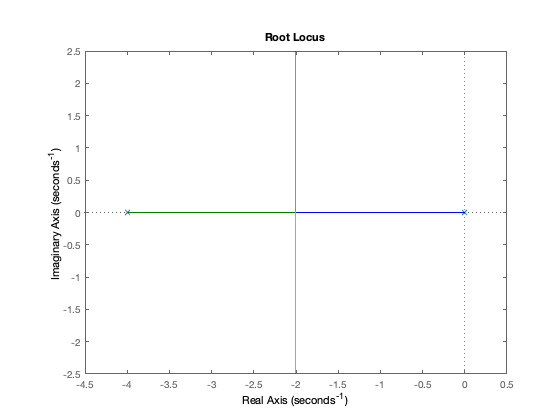

In [3]:
GH = series(G,H);
rlocus(GH)

In common with previous examples, we chose closed-loop poles at $s=-2\pm 
j2$ and determine $K_0$:

In [4]:
s1 = -2+2j;
K0 = rlocfind(GH,s1)

K0 =
     8


As an aside, we calculate the step response for comparison later:

In [5]:
Gc1 = feedback(K0*G,H);
[y1,t1]=step(Gc1,10);

The system is type 1 so that the static velocity error

$$K_v = \left.sG(s)H(s)\right|_{s=0}=\left.s\frac{K_0}{s(s+4)}\right|_{s=0} 
=\frac{K_0}{4}=2.$$

We would, for the purposes of illustration, like to increase the static 
velocity error to 10 which will make the steady-state velocity error equal to 
10%.

Thus we need $K = 40$.

In [6]:
K=40;
Kc = K0/K

Kc =
    0.2000


Now 

In [7]:
abs(s1)

ans =
    2.8284


so let the zero be

In [8]:
z0 = -3/10

z0 =
   -0.3000


and

In [9]:
p0 = Kc*z0

p0 =
   -0.0600


so

In [10]:
Dlag = zpk([z0],[p0],Kc)


Dlag =
 
  0.2 (s+0.3)
  -----------
   (s+0.06)
 
Continuous-time zero/pole/gain model.



Let us see how we have done.

In [11]:
Go2 = Dlag*GH


Go2 =
 
    0.2 (s+0.3)
  ----------------
  s (s+0.06) (s+4)
 
Continuous-time zero/pole/gain model.



In [12]:
[poles] = rlocus(Go2,K)

poles =
  -1.8576 + 1.8730i
  -1.8576 - 1.8730i
  -0.3449 + 0.0000i


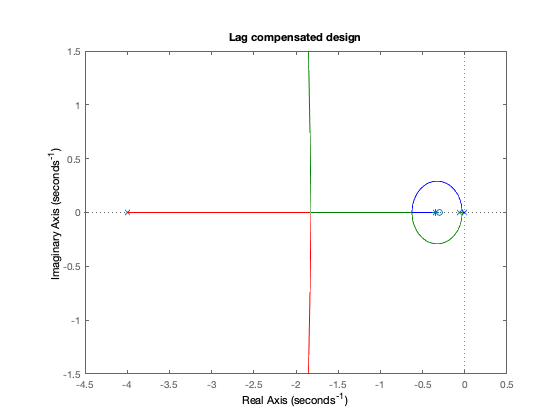

In [13]:
rlocus(Go2),hold on,plot(poles,'*'),...
    title('Lag compensated design'),...
    hold off

The closed-loop system:

In [14]:
Gc2 = feedback(K*Dlag*G,H)


Gc2 =
 
              8 (s+0.3)
  ---------------------------------
  (s+0.3449) (s^2 + 3.715s + 6.959)
 
Continuous-time zero/pole/gain model.



has step response

In [15]:
[y2,t2]=step(Gc2,10);

Finally we compare the lag-compensated and gain compensated responses:

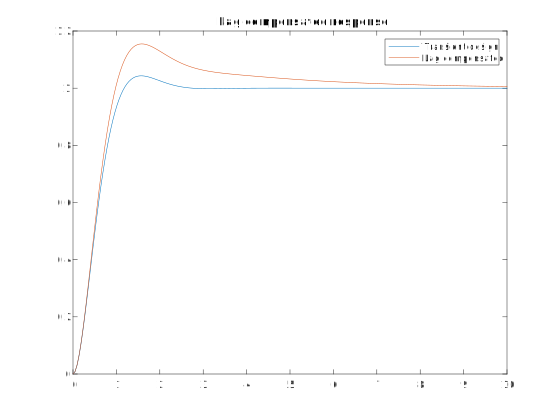

In [16]:
plot(t1,y1,t2,y2),title('Lag compensated response'),...
    legend('Transient design','Lag compensated')

## Comments

The lag compensator has a significantly longer settling time and a raised overshoot. These effects can be explained by examination of the closed-loop transfer function.

The benefits of the lag compensated repsonse can only be really seen when we compare the ramp responses. To determine the ramp response, we need to add an integrator to the plant and find the error responses:

In [17]:
Ge1 = 1/(1+K0*G*H);
[y3,t3]=step(Ge1*1/s,10);


In [18]:
Ge2 = 1/(1+K*Dlag*G*H);
[y4,t4]=step(Ge2*1/s,10);

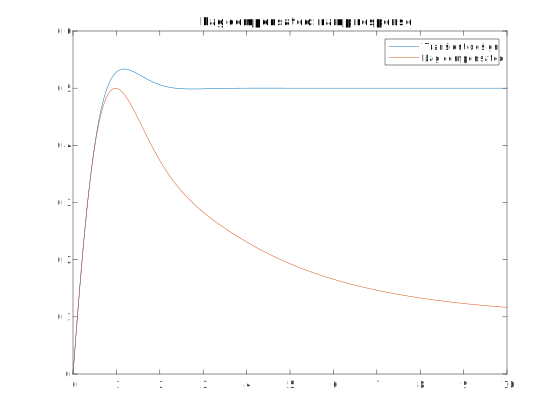

In [19]:
plot(t3,y3,t4,y4),title('Lag compensated: ramp response'),...
    legend('Transient design','Lag compensated')

The error is certainly reduced, but the settling time is rather long. To improve the design, a strategy would be to reduce the size of the lag pole to reduce still further the dynamic effects of the compensator on the settling 
time. However, the zero will still have an effect on the overshoot.

## Resources

An executable version of this document is available to download as a MATLAB Live Script file [cclag.mlx](matlab/cclag.mlx).

You can simulate this design after defining the parameters:

In [20]:
%%file params.m
% PARAMS - parameters for Lag Compensator Simulation
K0 = 8
Kc = 8/40
K = 8/Kc

G = tf(1,conv([1,0],[1,4]))
Clag = Kc*tf([1, 0.3],[1, 0.06])

H = 1;
F = 1;

K0 =
     8
Kc =
    0.2000
K =
    40

G =
 
      1
  ---------
  s^2 + 4 s
 
Continuous-time transfer function.


Clag =
 
  0.2 s + 0.06
  ------------
    s + 0.06
 
Continuous-time transfer function.



using this Simulink model [lag_sim.slx](matlab/lag_sim.slx) [[params.m](matlab/params.c)].